# BrainAccess - Record and Filter the Dataset

Here, we directly record the dataset from the BrainAccess device and then filter the dataset so that it is ready for furter data processing.
Steps:

1. Read the Data from the BrainAccess device, in the continuous mode.
2. Display the dataset, about how it looks.

Opening raw data file C:\Users\Prasannjeet\Documents\Project\test-4.fif...
    Range : 0 ... 21174 =      0.000 ...    84.696 secs


Ready.
Reading 0 ... 21174  =      0.000 ...    84.696 secs...


C:\Users\Prasannjeet\AppData\Local\Temp\ipykernel_13128\2262223126.py:7: RuntimeWarning: This filename (C:\Users\Prasannjeet\Documents\Project\test-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data = mne.io.read_raw_fif(file_path, preload=True)


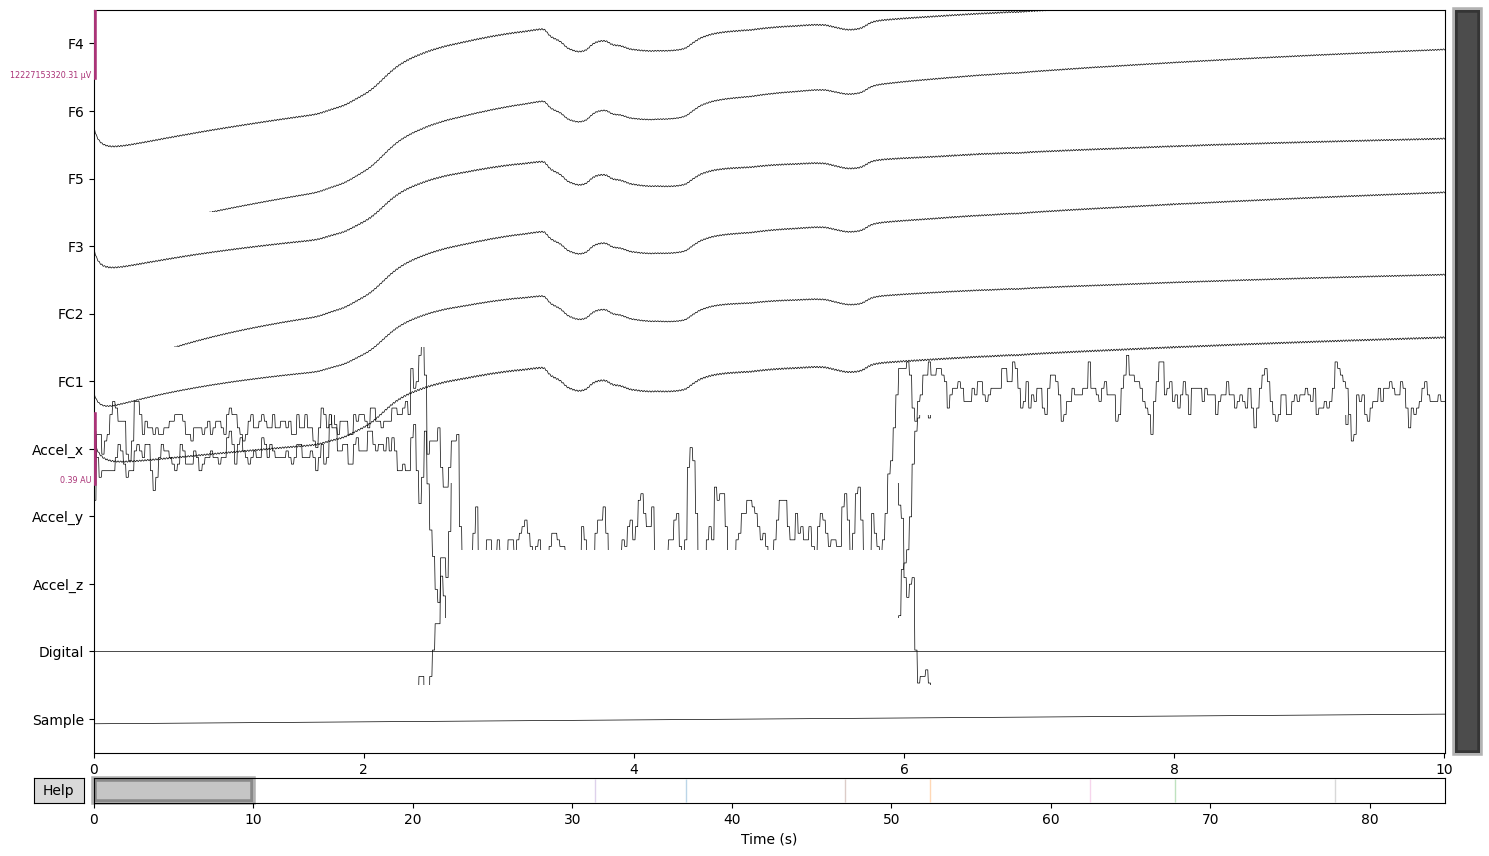

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (6.604 s)

     0       1       2        3
0 -0.0 -497.03 -948.72 -1325.40
1  0.0 -393.05 -752.55 -1056.29
2 -0.0 -490.76 -936.37 -1307.00
3 -0.0 -410.47 -784.58 -1098.24
4  0.0 -373.65 -713.71  -998.22
5  0.0 -506.36 -965.48 -1346.64
Writing C:\Users\Prasannjeet\Documents\Project\test-4_baseline_corrected.fif
Closing C:\Users\Prasannjeet\Documents\Project\test-4_baseline_corrected.fif
[done]
Number of channels: 6
Used Annotations descriptions:

C:\Users\Prasannjeet\AppData\Local\Temp\ipykernel_13128\2262223126.py:39: RuntimeWarning: This filename (C:\Users\Prasannjeet\Documents\Project\test-4_baseline_corrected.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_data.save(file_path.replace('.fif', '_baseline_corrected.fif'), overwrite=True)


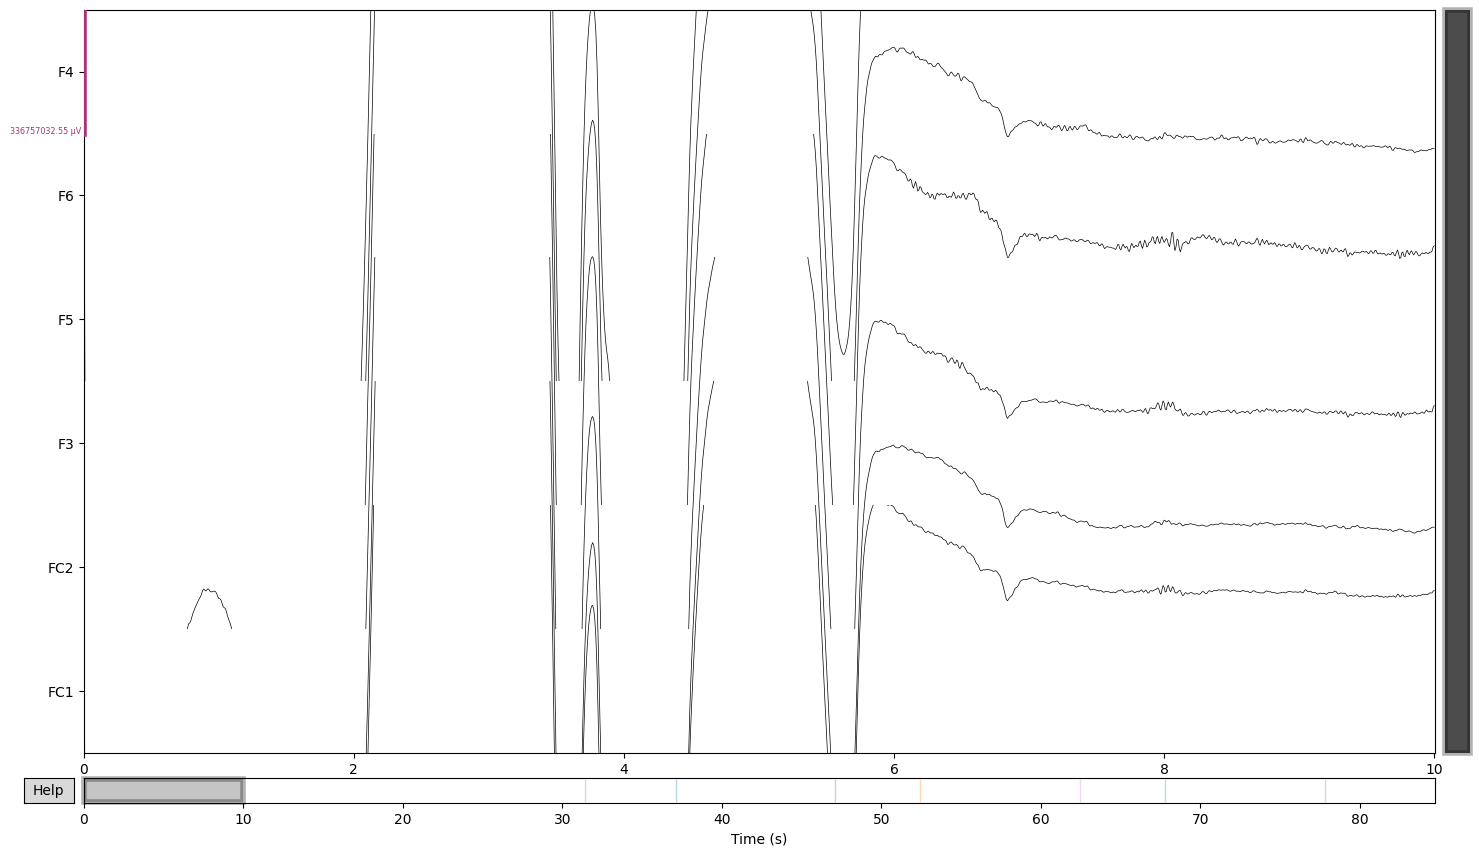

In [4]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\Prasannjeet\\Documents\\Project\\test-4.fif'
raw_data = mne.io.read_raw_fif(file_path, preload=True)

# Plot the data
raw_data.plot(scalings='auto', verbose=False)
plt.show()

# Remove the unwanted channels
raw_data.drop_channels(['Accel_x', 'Accel_y', 'Accel_z', 'Digital', 'Sample'])

# Define a function to remove the mean (baseline)
def remove_mean(x):
    return x - np.mean(x)

# Apply the function
raw_data.apply_function(remove_mean, picks='eeg')

# Apply the filter
raw_data.filter(0.5, 30)

# Get the actual data as a NumPy array
data = raw_data.get_data()

# Convert the data to a DataFrame for pretty printing
df = pd.DataFrame(data)

# Round off to two decimal places
df = df.round(2)

# Print the first 4 columns of all rows
print(df.iloc[:, :4])

# Save the baseline corrected data
raw_data.save(file_path.replace('.fif', '_baseline_corrected.fif'), overwrite=True)

# To check the number of channels
print(f"Number of channels: {raw_data.info['nchan']}")

# Plot the data
# Get the events from annotations
events, event_id = mne.events_from_annotations(raw_data)
raw_data.plot(scalings='auto', verbose=False, events=events)
plt.show()
